In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [48]:
# đọc file 
df= pd.read_excel('P1-SuperStoreUS-2015.xlsx',index_col=0)
df

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 20847 to 25914
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        1952 non-null   object        
 1   Discount              1952 non-null   float64       
 2   Unit Price            1952 non-null   float64       
 3   Shipping Cost         1952 non-null   float64       
 4   Customer ID           1952 non-null   int64         
 5   Customer Name         1952 non-null   object        
 6   Ship Mode             1952 non-null   object        
 7   Customer Segment      1952 non-null   object        
 8   Product Category      1952 non-null   object        
 9   Product Sub-Category  1952 non-null   object        
 10  Product Container     1952 non-null   object        
 11  Product Name          1952 non-null   object        
 12  Product Base Margin   1936 non-null   float64       
 13  Country           

In [50]:
df=df.iloc[99:1600]


In [51]:
df

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
Row ID,,,,,,,,,,,,,,,,,,,,,
5361,Critical,0.02,49.99,19.99,181,Wesley Waller,Regular Air,Small Business,Technology,Computer Peripherals,...,West,California,San Francisco,94122,2015-02-21,2015-02-21,-76.8900,18,901.81,38087
522,High,0.07,1.68,1.57,181,Wesley Waller,Regular Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,California,San Francisco,94122,2015-05-22,2015-05-23,-35.7500,116,186.59,3585
23361,Critical,0.02,49.99,19.99,184,Phillip Holmes,Regular Air,Small Business,Technology,Computer Peripherals,...,East,Massachusetts,Arlington,2474,2015-02-21,2015-02-21,-76.8900,5,250.50,88360
18521,High,0.07,10.06,2.06,188,Alex Harrell,Regular Air,Corporate,Office Supplies,Paper,...,Central,Texas,Gainesville,76240,2015-05-22,2015-05-22,152.6556,23,221.24,88361
18522,High,0.07,1.68,1.57,188,Alex Harrell,Regular Air,Corporate,Office Supplies,Pens & Art Supplies,...,Central,Texas,Gainesville,76240,2015-05-22,2015-05-23,7.1500,29,46.65,88361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18419,Medium,0.05,15.68,3.73,2840,Bob Berg,Regular Air,Corporate,Furniture,Office Furnishings,...,South,Florida,North Miami,33161,2015-06-11,2015-06-13,1166.6280,17,260.01,87885
18420,Medium,0.00,14.98,8.99,2840,Bob Berg,Regular Air,Corporate,Furniture,Office Furnishings,...,South,Florida,North Miami,33161,2015-06-11,2015-06-12,-40.6042,18,273.79,87885
18421,Medium,0.02,38.76,13.26,2840,Bob Berg,Regular Air,Corporate,Office Supplies,Paper,...,South,Florida,North Miami,33161,2015-06-11,2015-06-12,-294.0840,1,44.62,87885


# đổi cột

In [52]:
df.rename(columns={'Unit Price' : 'unitprice','Shipping Cost': 'shipcost', 
                         'Ship Mode':'shipmode','Customer Segment':'customerseg',
                         'Product Category':'PCate','Product Container':'PCon',
                         'Quantity ordered new':'Quantity'},inplace=True)
df

C:\Users\hungl\AppData\Local\Temp\ipykernel_14508\2089671222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Unit Price' : 'unitprice','Shipping Cost': 'shipcost',


,Order Priority,Discount,unitprice,shipcost,Customer ID,Customer Name,shipmode,customerseg,PCate,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity,Sales,Order ID
Row ID,,,,,,,,,,,,,,,,,,,,,
5361,Critical,0.02,49.99,19.99,181,Wesley Waller,Regular Air,Small Business,Technology,Computer Peripherals,...,West,California,San Francisco,94122,2015-02-21,2015-02-21,-76.8900,18,901.81,38087
522,High,0.07,1.68,1.57,181,Wesley Waller,Regular Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,California,San Francisco,94122,2015-05-22,2015-05-23,-35.7500,116,186.59,3585
23361,Critical,0.02,49.99,19.99,184,Phillip Holmes,Regular Air,Small Business,Technology,Computer Peripherals,...,East,Massachusetts,Arlington,2474,2015-02-21,2015-02-21,-76.8900,5,250.50,88360
18521,High,0.07,10.06,2.06,188,Alex Harrell,Regular Air,Corporate,Office Supplies,Paper,...,Central,Texas,Gainesville,76240,2015-05-22,2015-05-22,152.6556,23,221.24,88361
18522,High,0.07,1.68,1.57,188,Alex Harrell,Regular Air,Corporate,Office Supplies,Pens & Art Supplies,...,Central,Texas,Gainesville,76240,2015-05-22,2015-05-23,7.1500,29,46.65,88361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18419,Medium,0.05,15.68,3.73,2840,Bob Berg,Regular Air,Corporate,Furniture,Office Furnishings,...,South,Florida,North Miami,33161,2015-06-11,2015-06-13,1166.6280,17,260.01,87885
18420,Medium,0.00,14.98,8.99,2840,Bob Berg,Regular Air,Corporate,Furniture,Office Furnishings,...,South,Florida,North Miami,33161,2015-06-11,2015-06-12,-40.6042,18,273.79,87885
18421,Medium,0.02,38.76,13.26,2840,Bob Berg,Regular Air,Corporate,Office Supplies,Paper,...,South,Florida,North Miami,33161,2015-06-11,2015-06-12,-294.0840,1,44.62,87885


# Tạo cột IsProfit biết rằng nếu Profit lớn hơn 0 thì là YES , ngược lại là NO

In [53]:
df['IsProfit'] = df['Profit'].apply(lambda x: 'YES' if x > 0 else 'NO')


C:\Users\hungl\AppData\Local\Temp\ipykernel_14508\1644961232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsProfit'] = df['Profit'].apply(lambda x: 'YES' if x > 0 else 'NO')


In [54]:
df

,Order Priority,Discount,unitprice,shipcost,Customer ID,Customer Name,shipmode,customerseg,PCate,Product Sub-Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity,Sales,Order ID,IsProfit
Row ID,,,,,,,,,,,,,,,,,,,,,
5361,Critical,0.02,49.99,19.99,181,Wesley Waller,Regular Air,Small Business,Technology,Computer Peripherals,...,California,San Francisco,94122,2015-02-21,2015-02-21,-76.8900,18,901.81,38087,NO
522,High,0.07,1.68,1.57,181,Wesley Waller,Regular Air,Corporate,Office Supplies,Pens & Art Supplies,...,California,San Francisco,94122,2015-05-22,2015-05-23,-35.7500,116,186.59,3585,NO
23361,Critical,0.02,49.99,19.99,184,Phillip Holmes,Regular Air,Small Business,Technology,Computer Peripherals,...,Massachusetts,Arlington,2474,2015-02-21,2015-02-21,-76.8900,5,250.50,88360,NO
18521,High,0.07,10.06,2.06,188,Alex Harrell,Regular Air,Corporate,Office Supplies,Paper,...,Texas,Gainesville,76240,2015-05-22,2015-05-22,152.6556,23,221.24,88361,YES
18522,High,0.07,1.68,1.57,188,Alex Harrell,Regular Air,Corporate,Office Supplies,Pens & Art Supplies,...,Texas,Gainesville,76240,2015-05-22,2015-05-23,7.1500,29,46.65,88361,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18419,Medium,0.05,15.68,3.73,2840,Bob Berg,Regular Air,Corporate,Furniture,Office Furnishings,...,Florida,North Miami,33161,2015-06-11,2015-06-13,1166.6280,17,260.01,87885,YES
18420,Medium,0.00,14.98,8.99,2840,Bob Berg,Regular Air,Corporate,Furniture,Office Furnishings,...,Florida,North Miami,33161,2015-06-11,2015-06-12,-40.6042,18,273.79,87885,NO
18421,Medium,0.02,38.76,13.26,2840,Bob Berg,Regular Air,Corporate,Office Supplies,Paper,...,Florida,North Miami,33161,2015-06-11,2015-06-12,-294.0840,1,44.62,87885,NO


In [55]:
df = df[['Discount', 'unitprice', 'shipcost', 'shipmode', 'customerseg', 'PCate', 
         'PCon', 'Region', 'Quantity', 'Sales', 'IsProfit']]
df

,Discount,unitprice,shipcost,shipmode,customerseg,PCate,PCon,Region,Quantity,Sales,IsProfit
Row ID,,,,,,,,,,,
5361,0.02,49.99,19.99,Regular Air,Small Business,Technology,Small Box,West,18,901.81,NO
522,0.07,1.68,1.57,Regular Air,Corporate,Office Supplies,Wrap Bag,West,116,186.59,NO
23361,0.02,49.99,19.99,Regular Air,Small Business,Technology,Small Box,East,5,250.50,NO
18521,0.07,10.06,2.06,Regular Air,Corporate,Office Supplies,Wrap Bag,Central,23,221.24,YES
18522,0.07,1.68,1.57,Regular Air,Corporate,Office Supplies,Wrap Bag,Central,29,46.65,YES
...,...,...,...,...,...,...,...,...,...,...,...
18419,0.05,15.68,3.73,Regular Air,Corporate,Furniture,Small Pack,South,17,260.01,YES
18420,0.00,14.98,8.99,Regular Air,Corporate,Furniture,Small Pack,South,18,273.79,NO
18421,0.02,38.76,13.26,Regular Air,Corporate,Office Supplies,Small Box,South,1,44.62,NO


# 4.Mã hóa categorical data dùng One-Hot-Endcoding

In [56]:
dinhhuong = pd.get_dummies(df['shipmode']).astype(int)
df.drop('shipmode',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

C:\Users\hungl\AppData\Local\Temp\ipykernel_14508\490238402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('shipmode',axis=1,inplace=True)


,Discount,unitprice,shipcost,customerseg,PCate,PCon,Region,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air
Row ID,,,,,,,,,,,,,
5361,0.02,49.99,19.99,Small Business,Technology,Small Box,West,18,901.81,NO,0,0,1
522,0.07,1.68,1.57,Corporate,Office Supplies,Wrap Bag,West,116,186.59,NO,0,0,1
23361,0.02,49.99,19.99,Small Business,Technology,Small Box,East,5,250.50,NO,0,0,1
18521,0.07,10.06,2.06,Corporate,Office Supplies,Wrap Bag,Central,23,221.24,YES,0,0,1
18522,0.07,1.68,1.57,Corporate,Office Supplies,Wrap Bag,Central,29,46.65,YES,0,0,1


In [57]:
dinhhuong = pd.get_dummies(df['customerseg']).astype(int)
df.drop('customerseg',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,PCate,PCon,Region,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air,Consumer,Corporate,Home Office,Small Business
Row ID,,,,,,,,,,,,,,,,
5361,0.02,49.99,19.99,Technology,Small Box,West,18,901.81,NO,0,0,1,0,0,0,1
522,0.07,1.68,1.57,Office Supplies,Wrap Bag,West,116,186.59,NO,0,0,1,0,1,0,0
23361,0.02,49.99,19.99,Technology,Small Box,East,5,250.50,NO,0,0,1,0,0,0,1
18521,0.07,10.06,2.06,Office Supplies,Wrap Bag,Central,23,221.24,YES,0,0,1,0,1,0,0
18522,0.07,1.68,1.57,Office Supplies,Wrap Bag,Central,29,46.65,YES,0,0,1,0,1,0,0


In [58]:

dinhhuong = pd.get_dummies(df['PCate']).astype(int)
df.drop('PCate',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,PCon,Region,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air,Consumer,Corporate,Home Office,Small Business,Furniture,Office Supplies,Technology
Row ID,,,,,,,,,,,,,,,,,,
5361,0.02,49.99,19.99,Small Box,West,18,901.81,NO,0,0,1,0,0,0,1,0,0,1
522,0.07,1.68,1.57,Wrap Bag,West,116,186.59,NO,0,0,1,0,1,0,0,0,1,0
23361,0.02,49.99,19.99,Small Box,East,5,250.50,NO,0,0,1,0,0,0,1,0,0,1
18521,0.07,10.06,2.06,Wrap Bag,Central,23,221.24,YES,0,0,1,0,1,0,0,0,1,0
18522,0.07,1.68,1.57,Wrap Bag,Central,29,46.65,YES,0,0,1,0,1,0,0,0,1,0


In [59]:

dinhhuong = pd.get_dummies(df['PCon']).astype(int)
df.drop('PCon',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,Region,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air,...,Furniture,Office Supplies,Technology,Jumbo Box,Jumbo Drum,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag
Row ID,,,,,,,,,,,,,,,,,,,,,
5361,0.02,49.99,19.99,West,18,901.81,NO,0,0,1,...,0,0,1,0,0,0,0,1,0,0
522,0.07,1.68,1.57,West,116,186.59,NO,0,0,1,...,0,1,0,0,0,0,0,0,0,1
23361,0.02,49.99,19.99,East,5,250.50,NO,0,0,1,...,0,0,1,0,0,0,0,1,0,0
18521,0.07,10.06,2.06,Central,23,221.24,YES,0,0,1,...,0,1,0,0,0,0,0,0,0,1
18522,0.07,1.68,1.57,Central,29,46.65,YES,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [60]:

dinhhuong = pd.get_dummies(df['Region']).astype(int)
df.drop('Region',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,Quantity,Sales,IsProfit,Delivery Truck,Express Air,Regular Air,Consumer,...,Jumbo Drum,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag,Central,East,South,West
Row ID,,,,,,,,,,,,,,,,,,,,,
5361,0.02,49.99,19.99,18,901.81,NO,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
522,0.07,1.68,1.57,116,186.59,NO,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
23361,0.02,49.99,19.99,5,250.50,NO,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
18521,0.07,10.06,2.06,23,221.24,YES,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
18522,0.07,1.68,1.57,29,46.65,YES,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [61]:
dinhhuong = pd.get_dummies(df['IsProfit'],drop_first=True)
dinhhuong=dinhhuong.astype(int)
df.drop('IsProfit',axis=1,inplace=True)
df= pd.concat([df,dinhhuong],axis=1)
df.head(5)

,Discount,unitprice,shipcost,Quantity,Sales,Delivery Truck,Express Air,Regular Air,Consumer,Corporate,...,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag,Central,East,South,West,YES
Row ID,,,,,,,,,,,,,,,,,,,,,
5361,0.02,49.99,19.99,18,901.81,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
522,0.07,1.68,1.57,116,186.59,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
23361,0.02,49.99,19.99,5,250.50,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
18521,0.07,10.06,2.06,23,221.24,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
18522,0.07,1.68,1.57,29,46.65,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1


In [62]:
df.rename(columns={'YES':'IsProfit'}, inplace=True)
df.head(5)

,Discount,unitprice,shipcost,Quantity,Sales,Delivery Truck,Express Air,Regular Air,Consumer,Corporate,...,Large Box,Medium Box,Small Box,Small Pack,Wrap Bag,Central,East,South,West,IsProfit
Row ID,,,,,,,,,,,,,,,,,,,,,
5361,0.02,49.99,19.99,18,901.81,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
522,0.07,1.68,1.57,116,186.59,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
23361,0.02,49.99,19.99,5,250.50,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
18521,0.07,10.06,2.06,23,221.24,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
18522,0.07,1.68,1.57,29,46.65,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1501 entries, 5361 to 21856
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Discount         1501 non-null   float64
 1   unitprice        1501 non-null   float64
 2   shipcost         1501 non-null   float64
 3   Quantity         1501 non-null   int64  
 4   Sales            1501 non-null   float64
 5   Delivery Truck   1501 non-null   int32  
 6   Express Air      1501 non-null   int32  
 7   Regular Air      1501 non-null   int32  
 8   Consumer         1501 non-null   int32  
 9   Corporate        1501 non-null   int32  
 10  Home Office      1501 non-null   int32  
 11  Small Business   1501 non-null   int32  
 12  Furniture        1501 non-null   int32  
 13  Office Supplies  1501 non-null   int32  
 14  Technology       1501 non-null   int32  
 15  Jumbo Box        1501 non-null   int32  
 16  Jumbo Drum       1501 non-null   int32  
 17  Large Box      

# Xây dựng mô hình dự báo IsProfit dựa trên Discount, unitprice, shipcost, shipmode, customerseg, PCate, PCon, Region, Quantity, Sales với Cross validation là train 80%, test 20% và random_state = 16

In [64]:
X = df.drop('IsProfit',axis=1).values
Y = df[['IsProfit']].values

In [65]:
# Chia tách ra trainning (huấn luyện) và testing (kiểm thử) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=16)

# Logistic

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train.flatten())

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# liblinear

In [67]:
from sklearn.linear_model import LogisticRegression

# Chọn solver và tạo mô hình hồi quy logistic
solver = 'liblinear' #(l1,l2)
max_iter = 10000
penalty = 'l2'  # L2 regularization, có thể thay đổi thành 'l1' nếu bạn muốn L1 regularization

model = LogisticRegression(solver=solver, max_iter=max_iter, penalty=penalty)

# Huấn luyện mô hình
model.fit(X_train, y_train)


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, solver='liblinear')

# Test liblinear

In [68]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6777408637873754
AUC: 0.6791925465838509


# Train liblinear

In [69]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6633333333333333
AUC: 0.6615684093437153


# ROC và AUE Plot

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# TEST

# Đường cong càng ôm góc trên bên trái của biểu đồ thì mô hình càng phân loại dữ liệu thành các danh mục tốt hơn.

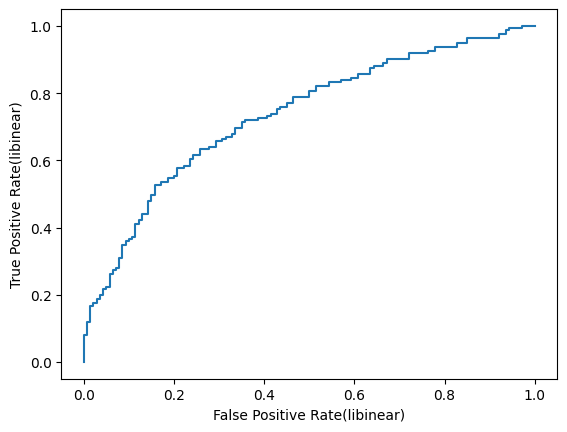

In [71]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.show() 

Để định lượng điều này, chúng ta có thể tính toán AUC – diện tích dưới đường cong – cho chúng ta biết phần nằm dưới đường cong là bao nhiêu.

AUC càng gần 1 thì mô hình càng tốt. Một mô hình có AUC bằng 0,5 không tốt hơn mô hình phân loại ngẫu nhiên.

In [72]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.7339840283939664

# ROC 

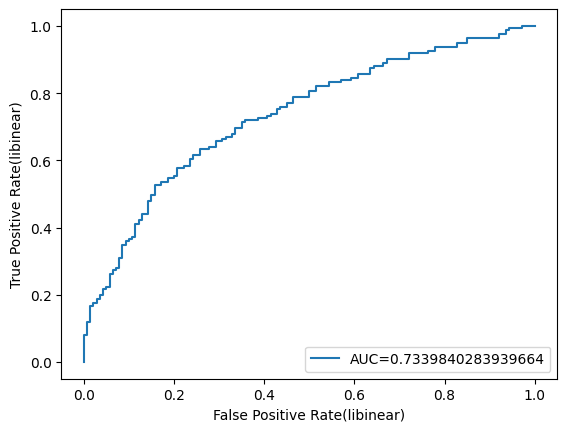

In [73]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.legend(loc=4)
plt.show()

# TRAIN

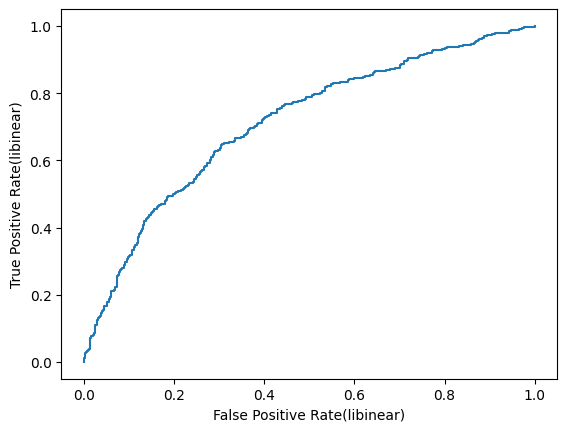

In [74]:
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.show() 

In [75]:
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
auc

0.7116490545050056

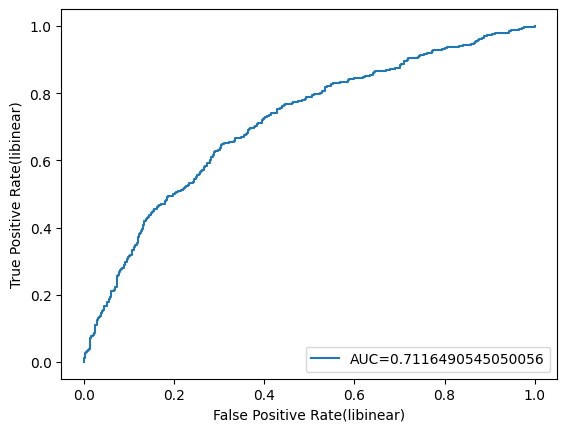

In [76]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.legend(loc=4)
plt.show()

# lbfgs

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TẬP TRAIN


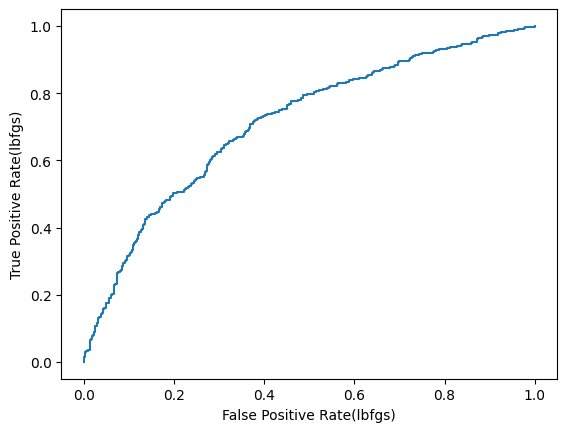

AUC test 0.7120300333704117


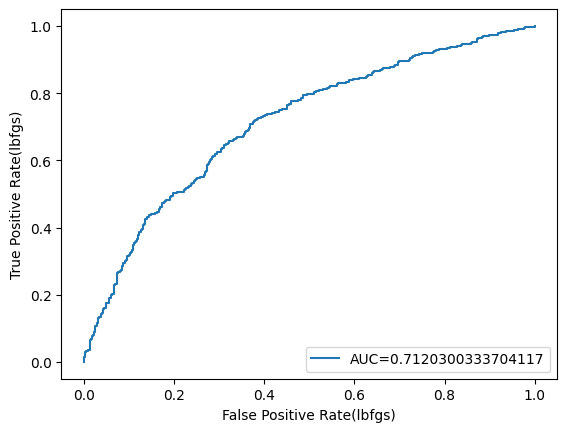

TẬP TEST(lbfgs)


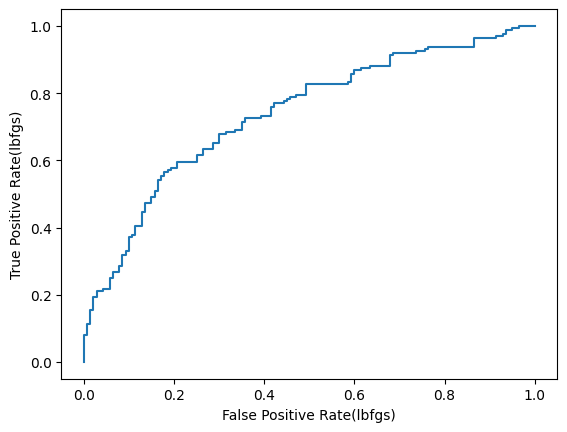

AUC test 0.7376220053238687


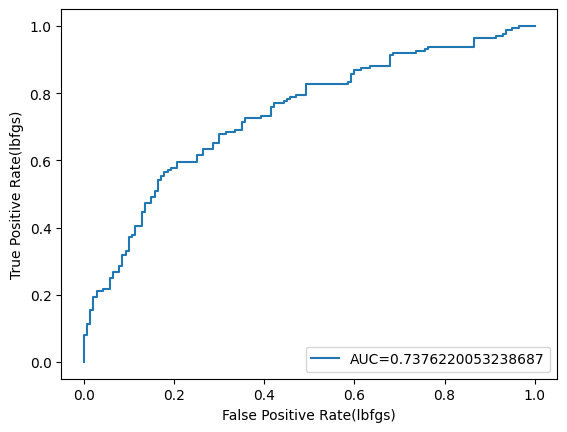

In [77]:
from sklearn.linear_model import LogisticRegression

# Chọn solver và tạo mô hình hồi quy logistic
solver = 'lbfgs'
max_iter = 10000
penalty = 'l2'  # L2 regularization, có thể thay đổi thành 'l1' nếu bạn muốn L1 regularization

model = LogisticRegression(solver=solver, max_iter=max_iter, penalty=penalty)

# Huấn luyện mô hình
model.fit(X_train, y_train)
# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(lbfgs)')
plt.xlabel('False Positive Rate(lbfgs)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(lbfgs)')
plt.xlabel('False Positive Rate(lbfgs)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST(lbfgs)')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(lbfgs)')
plt.xlabel('False Positive Rate(lbfgs)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(lbfgs)')
plt.xlabel('False Positive Rate(lbfgs)')
plt.legend(loc=4)
plt.show()

# tập test voi lbfgs

In [78]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6777408637873754
AUC: 0.6791925465838509


# tập train lbfgs

In [79]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6641666666666667
AUC: 0.6625973303670746


# AUE and ROC plot

# Newton-cg

TẬP TRAIN


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


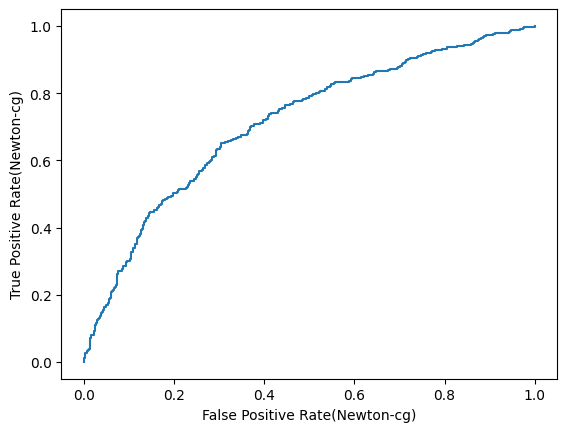

AUC test 0.7116935483870968


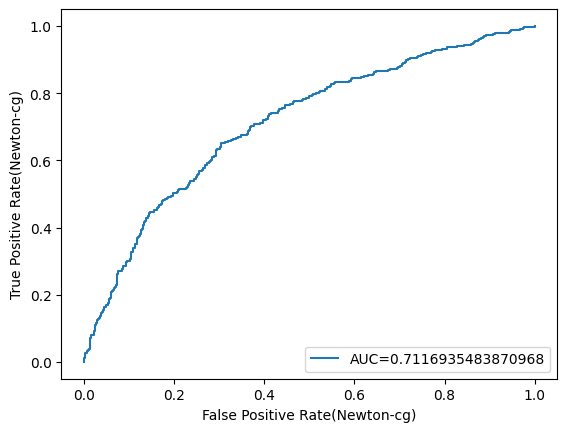

TẬP TEST


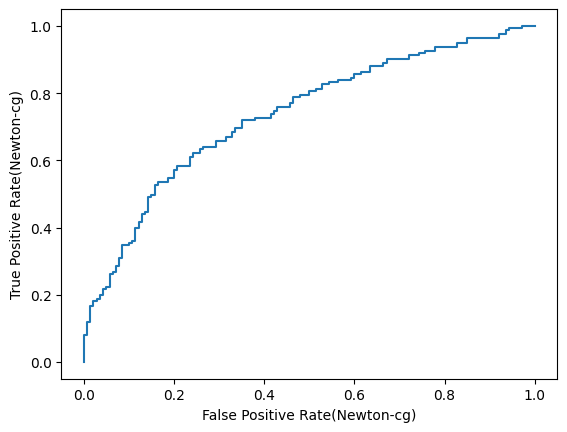

AUC test 0.7346495119787045


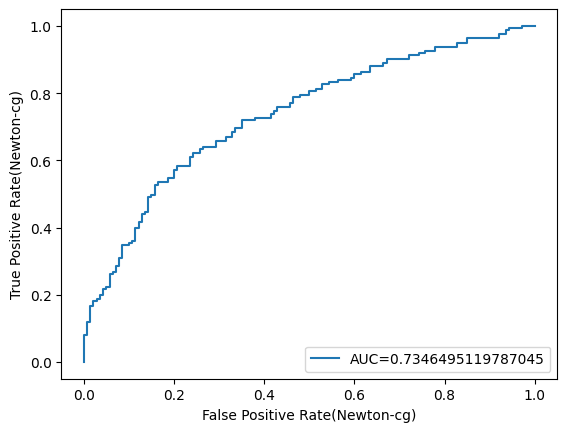

In [80]:
from sklearn.linear_model import LogisticRegression

# Chọn solver và tạo mô hình hồi quy logistic
solver = 'newton-cg'
max_iter = 10000
penalty = 'l2'  # L2 regularization, có thể thay đổi thành 'l1' nếu bạn muốn L1 regularization

model = LogisticRegression(solver=solver, max_iter=max_iter, penalty=penalty)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Newton-cg)')
plt.xlabel('False Positive Rate(Newton-cg)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Newton-cg)')
plt.xlabel('False Positive Rate(Newton-cg)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Newton-cg)')
plt.xlabel('False Positive Rate(Newton-cg)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Newton-cg)')
plt.xlabel('False Positive Rate(Newton-cg)')
plt.legend(loc=4)
plt.show()

# tập test voi newton-cg

In [81]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6710963455149501
AUC: 0.6720496894409939


# tập train newton-cg

In [82]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6633333333333333
AUC: 0.6616240266963292


# newton-cholesky

TẬP TRAIN


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


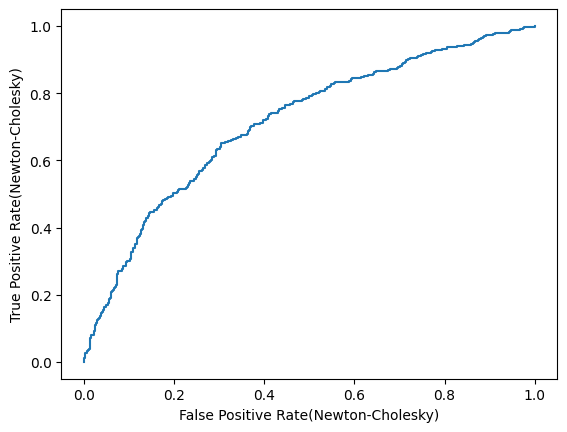

AUC test 0.7116935483870968


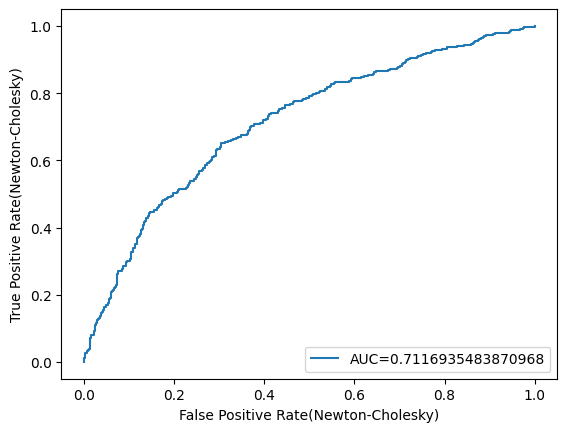

TẬP TEST


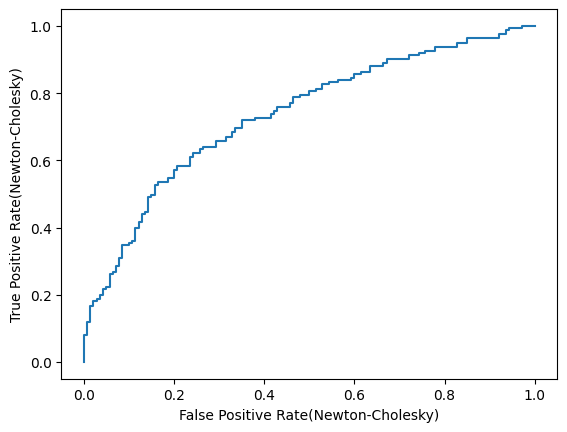

AUC test 0.7346495119787045


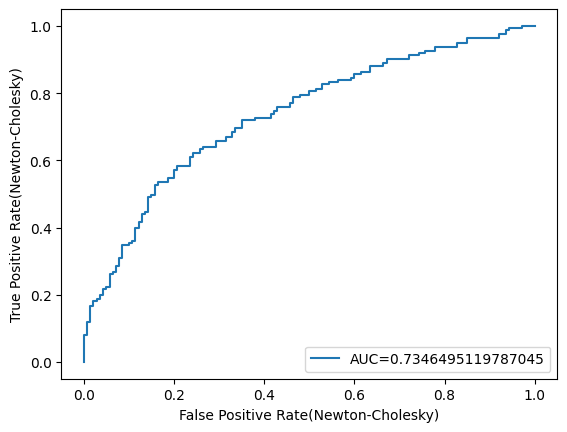

In [83]:
from sklearn.linear_model import LogisticRegression

# Chọn solver và tạo mô hình hồi quy logistic
solver = 'newton-cholesky'
max_iter = 10000
penalty = 'l2'  # L2 regularization, có thể thay đổi thành 'l1' nếu bạn muốn L1 regularization

model = LogisticRegression(solver=solver, max_iter=max_iter, penalty=penalty)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Newton-Cholesky)')
plt.xlabel('False Positive Rate(Newton-Cholesky)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Newton-Cholesky)')
plt.xlabel('False Positive Rate(Newton-Cholesky)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Newton-Cholesky)')
plt.xlabel('False Positive Rate(Newton-Cholesky)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Newton-Cholesky)')
plt.xlabel('False Positive Rate(Newton-Cholesky)')
plt.legend(loc=4)
plt.show()


In [84]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6710963455149501
AUC: 0.6720496894409939


In [85]:
    from sklearn.metrics import accuracy_score, roc_curve, auc

    y_pred = model.predict(X_train)

    # Tính Accuracy
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Accuracy: {accuracy}')

    # Tính ROC Curve và AUC
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc}')

Accuracy: 0.6633333333333333
AUC: 0.6616240266963292


# Sag

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TẬP TRAIN


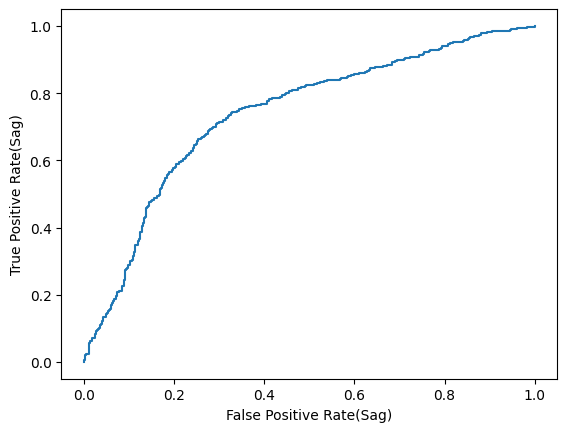

AUC test 0.7370244716351502


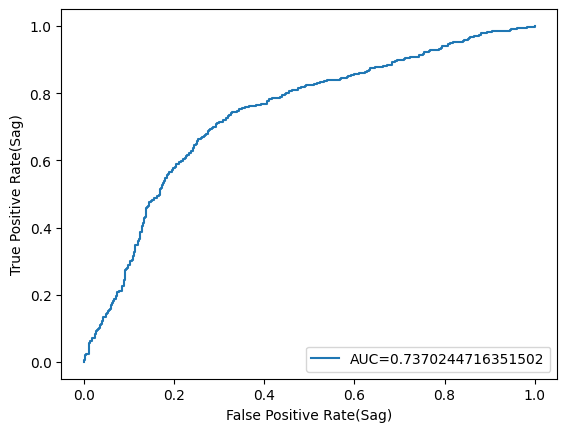

TẬP TEST


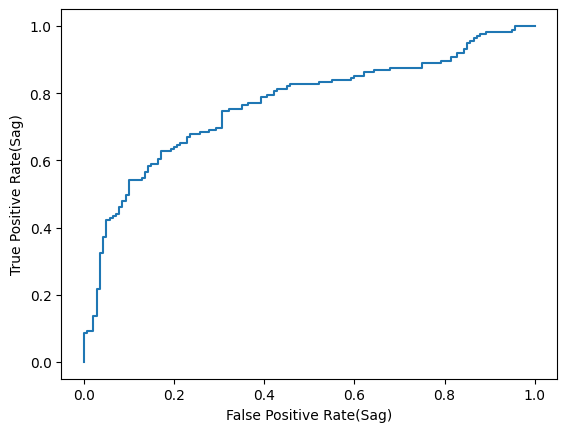

AUC test 0.7657497781721384


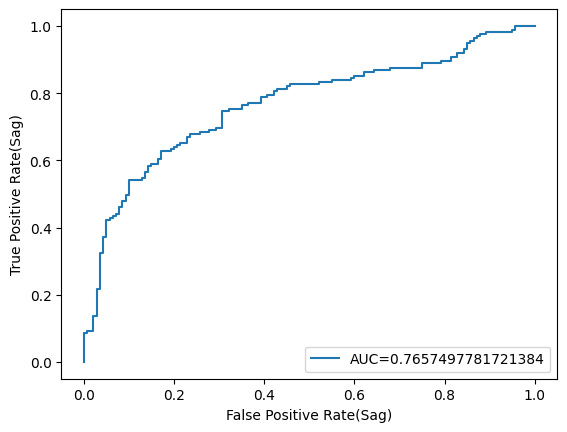

In [86]:
from sklearn.linear_model import LogisticRegression

# Chọn solver và tạo mô hình hồi quy logistic
solver = 'sag'
max_iter = 10000
penalty = 'l2'  # L2 regularization, có thể thay đổi thành 'l1' nếu bạn muốn L1 regularization

model = LogisticRegression(solver=solver, max_iter=max_iter, penalty=penalty)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Sag)')
plt.xlabel('False Positive Rate(Sag)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Sag)')
plt.xlabel('False Positive Rate(Sag)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Sag)')
plt.xlabel('False Positive Rate(Sag)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Sag)')
plt.xlabel('False Positive Rate(Sag)')
plt.legend(loc=4)
plt.show()

In [87]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6877076411960132
AUC: 0.7015527950310559


In [88]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6633333333333333
AUC: 0.6565072302558399


# Saga

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TẬP TRAIN


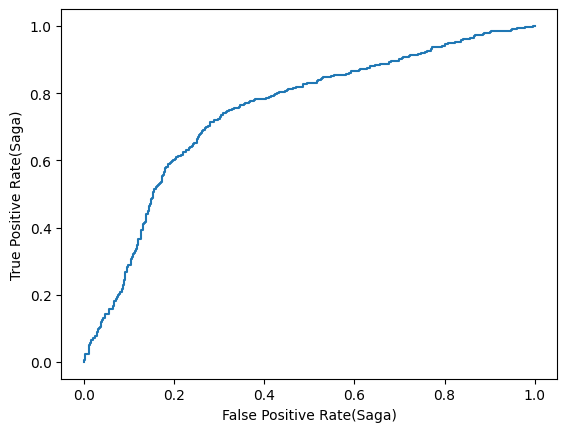

AUC test 0.7436568409343715


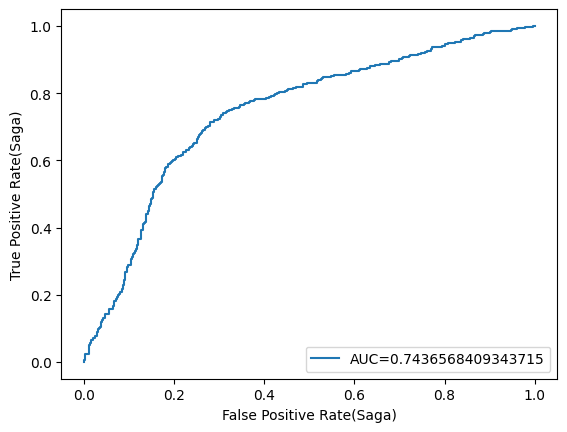

TẬP TEST


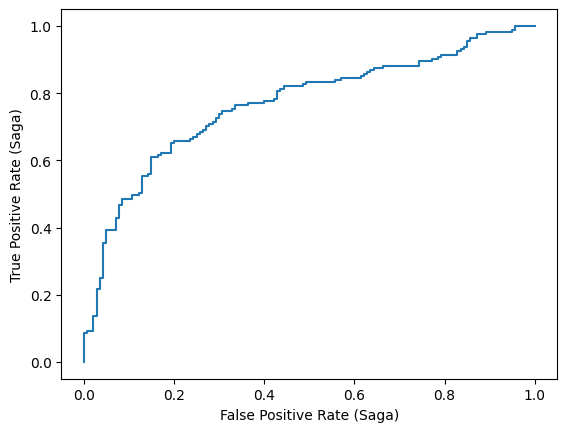

AUC test 0.7657054125998225


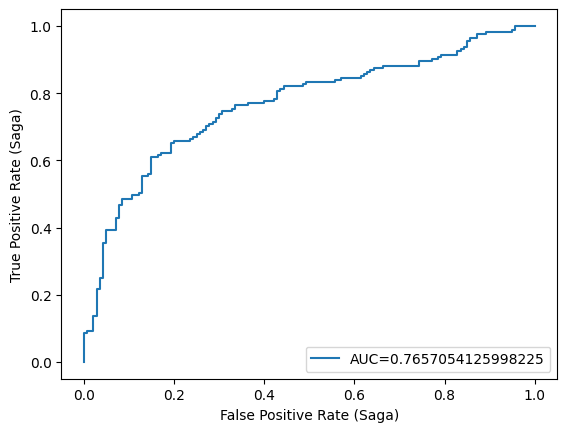

In [89]:
from sklearn.linear_model import LogisticRegression

# Chọn solver và tạo mô hình hồi quy logistic
solver = 'saga'
max_iter = 10000
penalty = 'l2'  # L2 regularization, có thể thay đổi thành 'l1' nếu bạn muốn L1 regularization

model = LogisticRegression(solver=solver, max_iter=max_iter, penalty=penalty)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# TRAIN
print ('TẬP TRAIN')
# AUE
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(Saga)')
plt.xlabel('False Positive Rate(Saga)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate(Saga)')
plt.xlabel('False Positive Rate(Saga)')
plt.legend(loc=4)
plt.show()

# TEST
print('TẬP TEST')
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate (Saga)')
plt.xlabel('False Positive Rate (Saga)')
plt.show() 

# tính AUC
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC test',auc)
# ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate (Saga)')
plt.xlabel('False Positive Rate (Saga)')
plt.legend(loc=4)
plt.show()


In [90]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6777408637873754
AUC: 0.6908385093167702


In [91]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.6725
AUC: 0.6663793103448277
